In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import ast
import re
import pickle as pk

In [ ]:
PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/komponentes/'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/parsed_data/full_dataset.csv')

In [ ]:
df.Nace2.nunique(), df.gr_code.nunique(), df.gr_stat_letter.nunique(), df.gr_stat_code.nunique()

(780, 64, 20, 82)

# Preparing embeddings

In [ ]:
df = pd.read_csv(PATH+'data_with_embeddings.csv', sep=';')

In [ ]:
def get_embeddings(method):
  embeddings = []
  for i in method:
    if i[1] == ' ':
      i = '['+i[2:]
    emb = ast.literal_eval(re.sub(' +',' ',str(i).replace('\n', '')).replace(' ', ', '))
    embeddings.append(emb)

  return embeddings

In [ ]:
bert_embeddings = get_embeddings(df.bert_embeddings.tolist())

In [ ]:
bert = pd.DataFrame(bert_embeddings)

In [ ]:
bert.to_csv(PATH+'bert_embeddings.csv', index=False)

In [ ]:
labse_embeddings = get_embeddings(df.labse_embeddings.tolist())

In [ ]:
labse = pd.DataFrame(labse_embeddings)
labse.to_csv(PATH+'labse_embeddings.csv', index=False)

# Dimensionality Reduction

UMAP should be used after clustering to visualize clusters

## PCA

In [ ]:
from sklearn.decomposition import PCA

PATH = '/content/drive/MyDrive/Univerui/0 MAGISTRAS/tiriamasis/komponentes/'

for name, embeding in zip(['bert', 'labse'],[bert_embeddings, labse_embeddings]):
  for component in [2, 5, 10, 50, 100, 300]:
    pca = PCA(n_components=component)
    result = pca.fit_transform(embeding)
    pk.dump(pca, open(PATH+f"{name}/pca/{component}.pkl","wb"))
    pd.DataFrame(result).to_csv(PATH+f"{name}/pca/{component}.csv", index=False)

## PCA Analysis

In [ ]:
pca = pk.load(open(f"{PATH}bert/pca/300.pkl",'rb'))

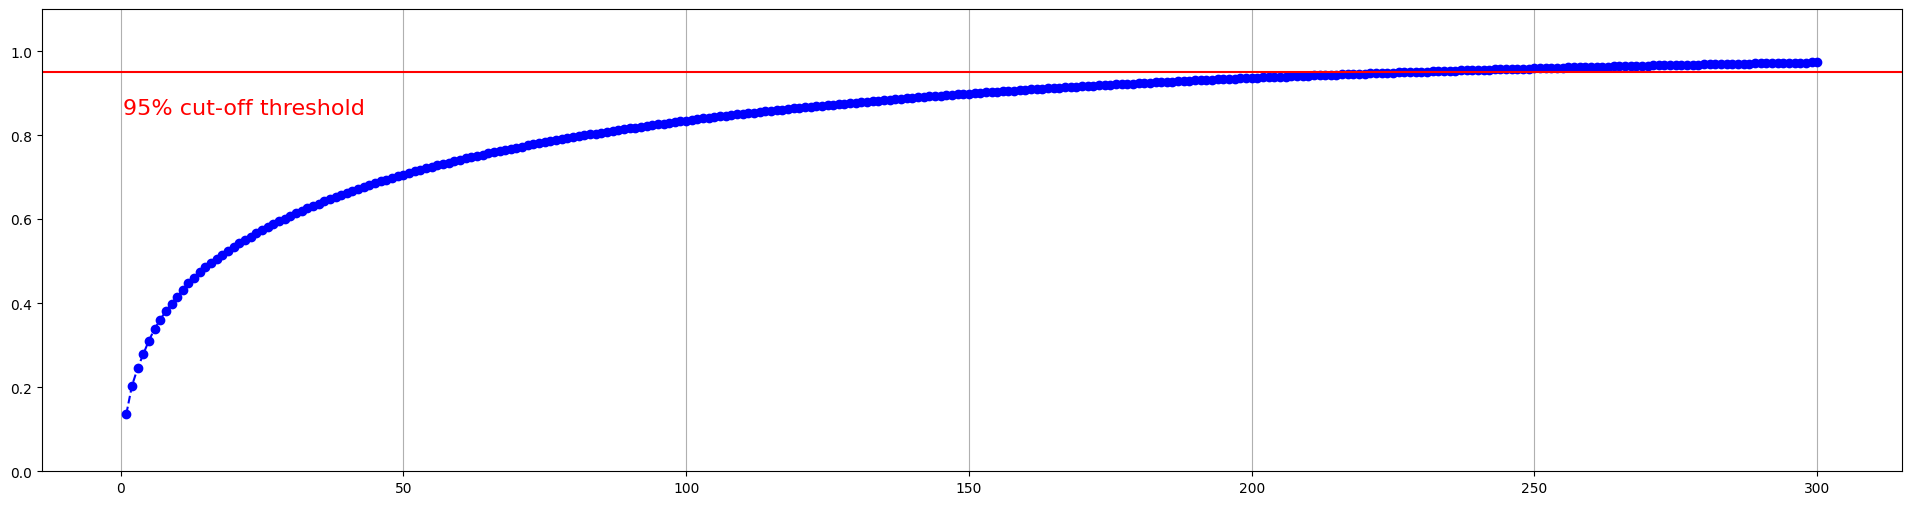

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,6)

fig, ax = plt.subplots()
xi = np.arange(1, 301, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

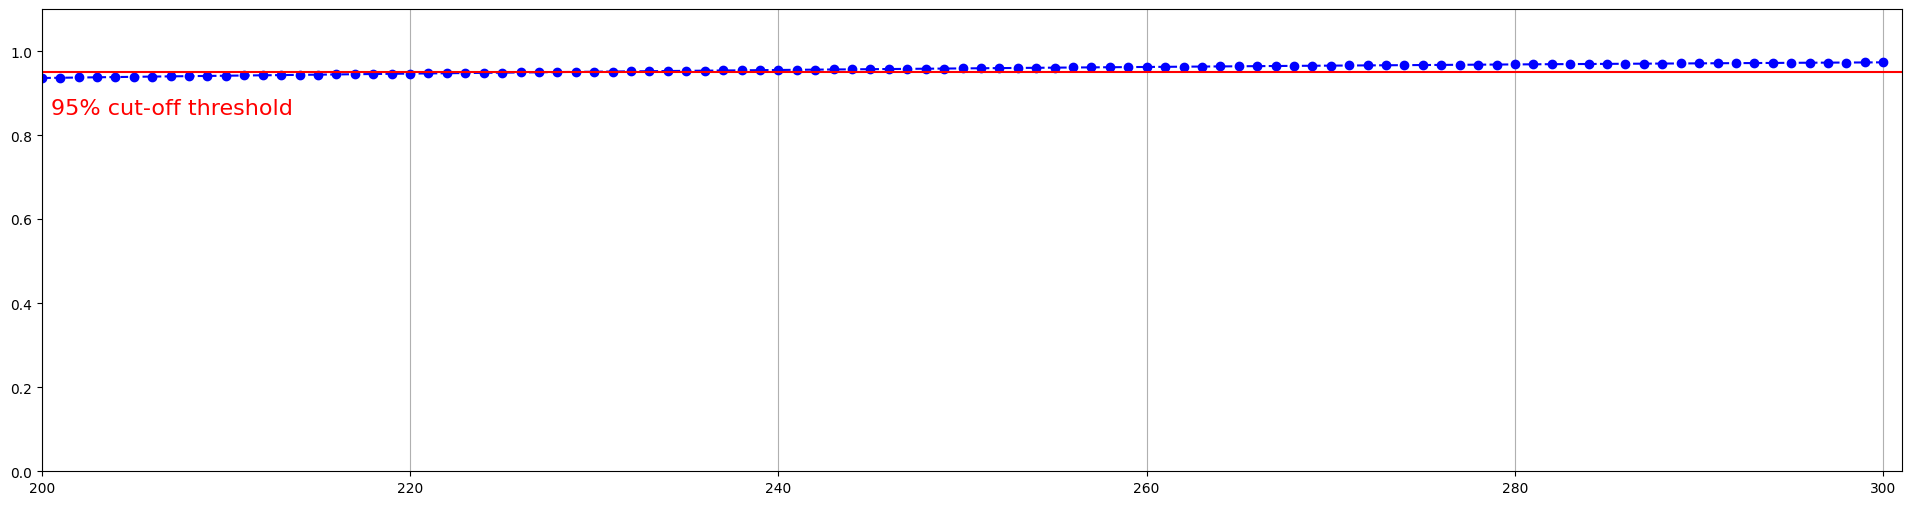

In [ ]:
fig, ax = plt.subplots()
xi = np.arange(1, 301, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlim(200,301)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(200.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance],
                                     index=['explained variance', 'cumulative'],
                                     columns=idx).T
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance# (iii.) Print explained variance as plain text
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.iloc[220:230])
print('-'*40)

PCA Overview
Total: 300 components
----------------------------------------
Mean explained variance: 0.003
----------------------------------------
     explained variance  cumulative
221            0.000472    0.947330
222            0.000464    0.947795
223            0.000463    0.948258
224            0.000457    0.948715
225            0.000455    0.949170
226            0.000453    0.949623
227            0.000449    0.950072
228            0.000440    0.950512
229            0.000438    0.950950
230            0.000435    0.951385
----------------------------------------


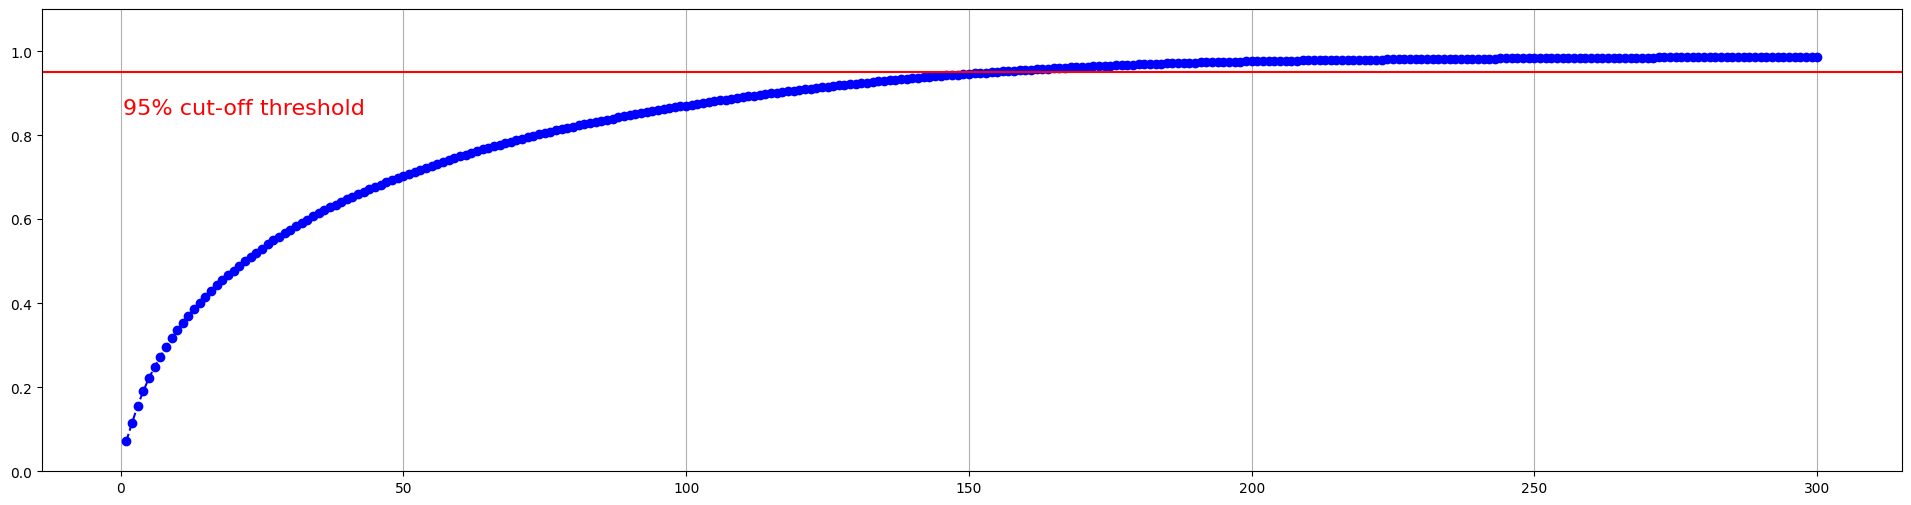

In [ ]:
pca = pk.load(open(f"{PATH}labse/pca/300.pkl",'rb'))

fig, ax = plt.subplots()
xi = np.arange(1, 301, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

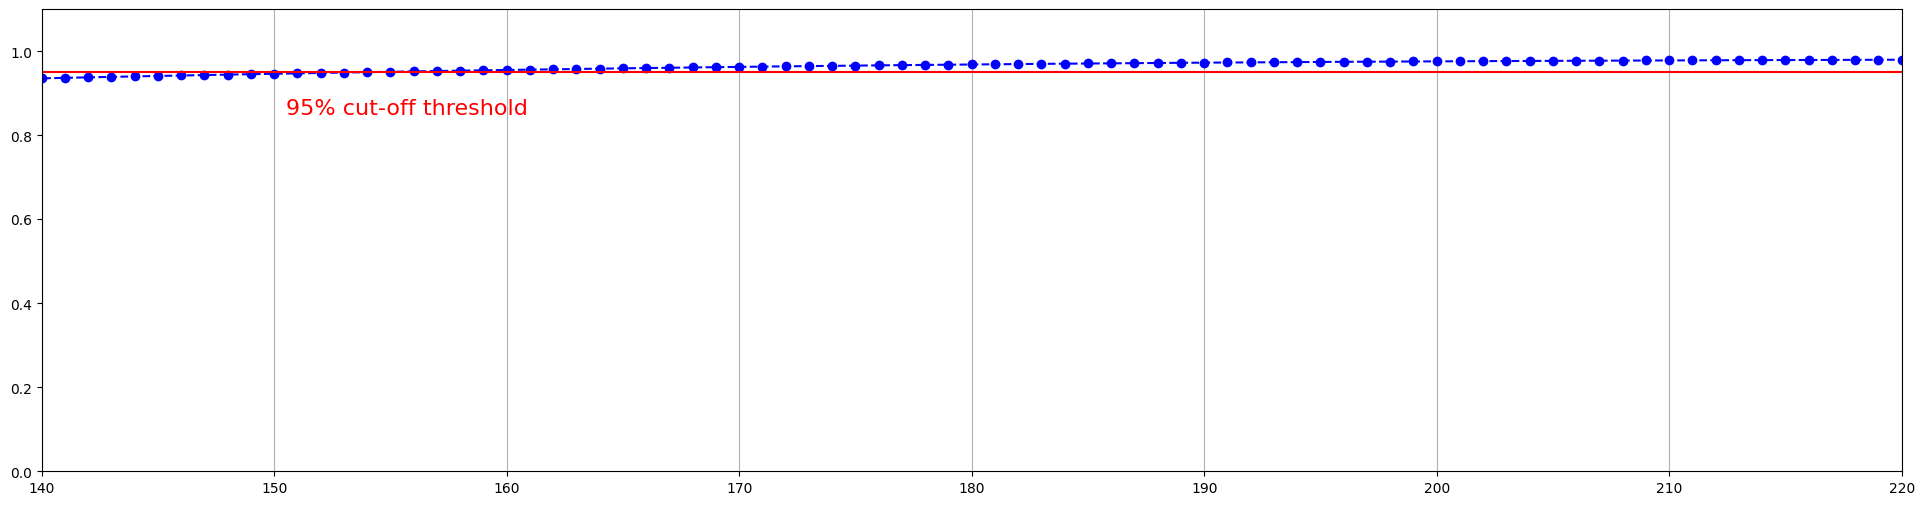

In [ ]:
fig, ax = plt.subplots()
xi = np.arange(1, 301, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlim(140,220)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(150.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance],
                                     index=['explained variance', 'cumulative'],
                                     columns=idx).T
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance# (iii.) Print explained variance as plain text
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.iloc[140:170])
print('-'*40)

PCA Overview
Total: 300 components
----------------------------------------
Mean explained variance: 0.003
----------------------------------------
     explained variance  cumulative
141            0.001166    0.936820
142            0.001139    0.937959
143            0.001123    0.939082
144            0.001116    0.940198
145            0.001105    0.941304
146            0.001081    0.942384
147            0.001056    0.943441
148            0.001031    0.944471
149            0.001025    0.945497
150            0.000994    0.946490
151            0.000977    0.947467
152            0.000948    0.948415
153            0.000946    0.949361
154            0.000922    0.950283
155            0.000911    0.951194
156            0.000899    0.952093
157            0.000882    0.952975
158            0.000867    0.953842
159            0.000859    0.954701
160            0.000823    0.955524
161            0.000803    0.956327
162            0.000795    0.957122
163            0.000774 

# Clustering experiments

In [ ]:
labse_pca = pd.read_csv(f"{PATH}labse/pca/300.csv")
bert_pca = pd.read_csv(f"{PATH}bert/pca/300.csv")

In [ ]:
bert_pca = bert_pca.iloc[:,:227]
labse_pca = labse_pca.iloc[:,:154]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, jaccard_score, davies_bouldin_score

## Bert Embeddings

### kmeans

In [ ]:
bert_kmeans = KMeans(n_clusters=20, random_state=42).fit(bert_pca)
bert_kmeans_preds = bert_kmeans.predict(bert_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(f"Silhouette Score: {silhouette_score(bert_pca, bert_kmeans_preds)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(bert_pca, bert_kmeans_preds)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(bert_pca, bert_kmeans_preds)}")

Silhouette Score: 0.04747595819859267
Calinski Harabasz Score: 702.2997733345718
Davies Bouldin Score: 3.2552473792863656


In [ ]:
kmeans = KMeans(n_clusters=780, random_state=42).fit(bert_pca)
kmeans_preds = kmeans.predict(bert_pca)

print(f"Silhouette Score: {silhouette_score(bert_pca, kmeans_preds)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(bert_pca, kmeans_preds)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(bert_pca, kmeans_preds)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.0591775922618861
Calinski Harabasz Score: 44.91893382371633
Davies Bouldin Score: 2.9031376861030145


### Affinity propogation

In [ ]:
from sklearn.cluster import AffinityPropagation

bert_ap = AffinityPropagation(random_state=42).fit(bert_pca)
bert_ap_preds = bert_ap.predict(bert_pca)

print(f"Silhouette Score: {silhouette_score(bert_pca, bert_ap_preds)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(bert_pca, bert_ap_preds)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(bert_pca, bert_ap_preds)}")

### AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

bert_agc = AgglomerativeClustering(n_clusters=20).fit(bert_pca)

print(f"Silhouette Score: {silhouette_score(bert_pca, bert_agc.labels_)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(bert_pca, bert_agc.labels_)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(bert_pca, bert_agc.labels_)}")

Silhouette Score: 0.013998107763648874
Calinski Harabasz Score: 539.9708009803442
Davies Bouldin Score: 3.548196381896601


### MiniBatch Kmeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans

bert_mini_kmeans = MiniBatchKMeans(n_clusters=20,
                        random_state=0,
                        batch_size=6,
                        max_iter=10,
                        n_init="auto").fit(bert_pca)

bert_mini_preds = bert_mini_kmeans.predict(bert_pca)

print(f"Silhouette Score: {silhouette_score(bert_pca, bert_mini_preds)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(bert_pca, bert_mini_preds)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(bert_pca, bert_mini_preds)}")

Silhouette Score: 0.035638320258634525
Calinski Harabasz Score: 642.8329456711595
Davies Bouldin Score: 3.12564643695261


### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

bert_spec_clust = SpectralClustering(n_clusters=20, random_state=42).fit(bert_pca)

print(f"Silhouette Score: {silhouette_score(bert_pca, bert_spec_clust.labels_)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(bert_pca, bert_spec_clust.labels_)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(bert_pca, bert_spec_clust.labels_)}")

## LaBSE Embeddings

### Kmeans

In [ ]:
labse_kmeans = KMeans(n_clusters=20, random_state=42).fit(labse_pca)
labse_kmeans_preds = labse_kmeans.predict(labse_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(f"Silhouette Score: {silhouette_score(labse_pca, labse_kmeans_preds)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(labse_pca, labse_kmeans_preds)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(labse_pca, labse_kmeans_preds)}")

Silhouette Score: 0.05645533209383495
Calinski Harabasz Score: 537.188405029713
Davies Bouldin Score: 3.260995343527649


### AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

labse_agc = AgglomerativeClustering(n_clusters=20).fit(labse_pca)

print(f"Silhouette Score: {silhouette_score(labse_pca, labse_agc.labels_)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(labse_pca, labse_agc.labels_)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(labse_pca, labse_agc.labels_)}")

Silhouette Score: 0.020482525945248617
Calinski Harabasz Score: 389.84617666285004
Davies Bouldin Score: 3.6751612520174546


### MiniBatchKMeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans

labse_mini_kmeans = MiniBatchKMeans(n_clusters=20,
                        random_state=0,
                        batch_size=6,
                        max_iter=10,
                        n_init="auto").fit(labse_pca)

labse_mini_preds = labse_mini_kmeans.predict(labse_pca)

print(f"Silhouette Score: {silhouette_score(labse_pca, labse_mini_preds)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(labse_pca, labse_mini_preds)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(labse_pca, labse_mini_preds)}")

Silhouette Score: 0.05459761978888674
Calinski Harabasz Score: 512.9424747593558
Davies Bouldin Score: 3.3075809459018473


In [ ]:
print(f"Silhouette Score: {silhouette_score(labse_pca, labse_mini_preds, metric='manhattan')}")

Silhouette Score: 0.023355036316994607


In [ ]:
print(f"Silhouette Score: {silhouette_score(labse_pca, labse_mini_preds, metric='chebyshev')}")

Silhouette Score: 0.08494593765055507


In [ ]:
print(f"Silhouette Score: {silhouette_score(labse_pca, labse_mini_preds, metric='minkowski')}")

Silhouette Score: 0.05459761979387081


In [ ]:
print(f"Silhouette Score: {silhouette_score(labse_pca, labse_mini_preds, metric='seuclidean')}")

Silhouette Score: -0.022650836843624306


In [ ]:
print(f"Silhouette Score: {silhouette_score(labse_pca, labse_mini_preds, metric='mahalanobis')}")

KeyboardInterrupt: 